In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

In [15]:
RESULTS_FOLDER = Path("../data/metrics/deuce_uncertainty_composition")
OUTPUT_FOLDER = Path("../data/figures")

ds_names = ["me","al","ep"]
data = {}
for n in ds_names:
    data[n] = xr.open_dataset(os.path.join(RESULTS_FOLDER, f"{n}_std.nc")).to_array(dim="timestamp")
data = xr.Dataset(data)

In [16]:
plt.style.use("bmh")

In [17]:
data_df = data.to_dataframe()
data_df["ep"] = np.sqrt(data_df["ep"])
data_df = data_df.rename(columns={"me":"prediction error", "al":"aleatoric uncertainty", "ep":"epistemic uncertainty"})
data_df_ = data_df.copy().rename(columns={"me":"prediction error", "al":"aleatoric", "ep":"epistemic"})
data_df_2 = data_df_.melt(value_vars=data_df_.columns, ignore_index=False, var_name="kind",value_name="uncertainty [dBZ]").reset_index()
data_df_2 = data_df_2.rename(columns={"z":"Z bin center","t":"lead time"})
data_df_2["lead time [min]"] = (data_df_2["lead time"] - 2.5).astype(int)

In [18]:
data_df_2

,Z bin center,lead time,timestamp,kind,uncertainty [dBZ],lead time [min]
0,7.5,7.5,2019-05-22 14:50:00,prediction error,7.590931,5
1,7.5,7.5,2019-05-22 15:05:00,prediction error,7.549212,5
2,7.5,7.5,2020-07-13 07:05:00,prediction error,8.007579,5
3,7.5,7.5,2020-07-24 03:30:00,prediction error,7.430927,5
4,7.5,7.5,2020-07-28 21:05:00,prediction error,6.955533,5
...,...,...,...,...,...,...
604753,57.5,57.5,2021-08-18 22:35:00,epistemic uncertainty,NaN,55
604754,57.5,57.5,2021-08-19 22:25:00,epistemic uncertainty,NaN,55
604755,57.5,57.5,2019-05-25 14:05:00,epistemic uncertainty,NaN,55
604756,57.5,57.5,2021-05-17 07:15:00,epistemic uncertainty,NaN,55


In [19]:
data_df = data_df.drop(columns=["prediction error"])

In [20]:
data_df_2

,Z bin center,lead time,timestamp,kind,uncertainty [dBZ],lead time [min]
0,7.5,7.5,2019-05-22 14:50:00,prediction error,7.590931,5
1,7.5,7.5,2019-05-22 15:05:00,prediction error,7.549212,5
2,7.5,7.5,2020-07-13 07:05:00,prediction error,8.007579,5
3,7.5,7.5,2020-07-24 03:30:00,prediction error,7.430927,5
4,7.5,7.5,2020-07-28 21:05:00,prediction error,6.955533,5
...,...,...,...,...,...,...
604753,57.5,57.5,2021-08-18 22:35:00,epistemic uncertainty,NaN,55
604754,57.5,57.5,2021-08-19 22:25:00,epistemic uncertainty,NaN,55
604755,57.5,57.5,2019-05-25 14:05:00,epistemic uncertainty,NaN,55
604756,57.5,57.5,2021-05-17 07:15:00,epistemic uncertainty,NaN,55


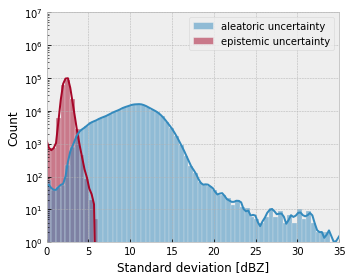

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
order = ["aleatoric uncertainty","epistemic uncertainty"]
g = sns.histplot(ax=ax, data=data_df,bins=100,kde=True, hue_order=order)
g.axes.set_yscale("log")
plt.xlabel("Standard deviation [dBZ]")
plt.xlim([0,35])
plt.ylim([1,10**7])
plt.tight_layout()
plt.savefig(OUTPUT_FOLDER / "uncertainty_histogram.pdf",dpi=300)

In [22]:
#bb_ = bb.drop("me",axis=1)
aa = data_df_2[data_df_2.kind != "prediction error"]

In [23]:
aa

,Z bin center,lead time,timestamp,kind,uncertainty [dBZ],lead time [min]
201586,7.5,7.5,2019-05-22 14:50:00,aleatoric uncertainty,7.577846,5
201587,7.5,7.5,2019-05-22 15:05:00,aleatoric uncertainty,7.761777,5
201588,7.5,7.5,2020-07-13 07:05:00,aleatoric uncertainty,8.125904,5
201589,7.5,7.5,2020-07-24 03:30:00,aleatoric uncertainty,7.464291,5
201590,7.5,7.5,2020-07-28 21:05:00,aleatoric uncertainty,7.635944,5
...,...,...,...,...,...,...
604753,57.5,57.5,2021-08-18 22:35:00,epistemic uncertainty,NaN,55
604754,57.5,57.5,2021-08-19 22:25:00,epistemic uncertainty,NaN,55
604755,57.5,57.5,2019-05-25 14:05:00,epistemic uncertainty,NaN,55
604756,57.5,57.5,2021-05-17 07:15:00,epistemic uncertainty,NaN,55


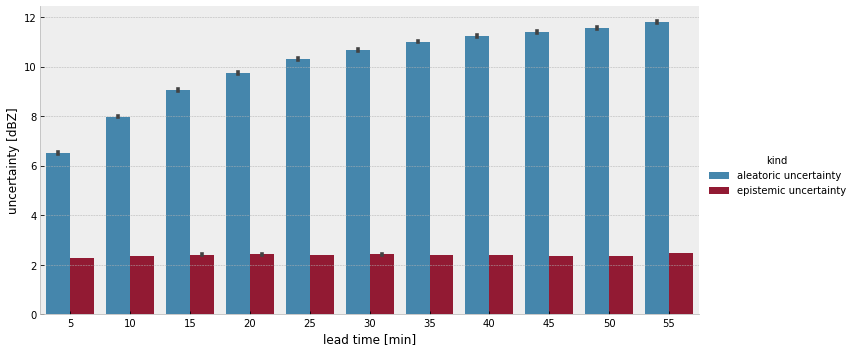

In [24]:
sns.catplot(data=aa, x="lead time [min]",y="uncertainty [dBZ]",hue="kind", kind="bar", aspect=2)
#plt.tight_layout()
plt.savefig(OUTPUT_FOLDER / "uncertainty_vs_lt_bar.pdf")

In [25]:
aa["observed reflectivity [dBZ]"] = list(zip((aa["Z bin center"] - 2.5).astype(int), (aa["Z bin center"]+2.5).astype(int)))

/tmp/ipykernel_1771497/1035825720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa["observed reflectivity [dBZ]"] = list(zip((aa["Z bin center"] - 2.5).astype(int), (aa["Z bin center"]+2.5).astype(int)))


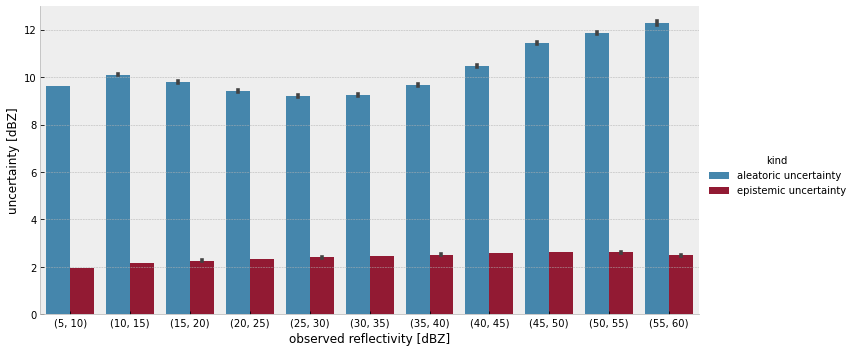

In [26]:
sns.catplot(data=aa, x="observed reflectivity [dBZ]",y="uncertainty [dBZ]",hue="kind", kind="bar",aspect=2)
#plt.grid(alpha=0.5)
plt.savefig(OUTPUT_FOLDER / "uncertainty_vs_z_bar.pdf")

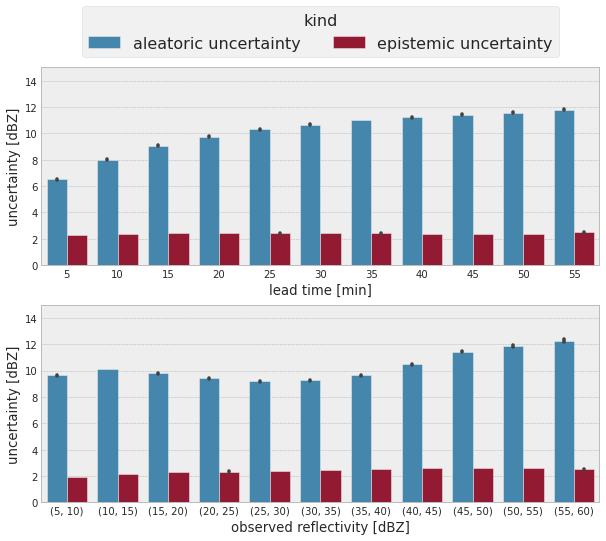

In [27]:
sns.set("paper",font_scale = 1.15)
plt.style.use("bmh")


fig, ax = plt.subplots(nrows=2, figsize=(10,8))
a = sns.barplot(data=aa,ax=ax[0], x="lead time [min]",y="uncertainty [dBZ]",hue="kind")
b = sns.barplot(data=aa, ax=ax[1], x="observed reflectivity [dBZ]",y="uncertainty [dBZ]",hue="kind")
ax[0].set_ylim([0,15])
ax[1].set_ylim([0,15])
sns.move_legend(ax[0], "upper center", bbox_to_anchor=(0.5, 1.35),ncol=3, fontsize=16)
plt.setp(ax[0].get_legend().get_title(), fontsize=16) # for legend title
ax[1].legend([],[], frameon=False, fontsize=16)
plt.savefig(OUTPUT_FOLDER / "uncertainty_bar.pdf", bbox_inches="tight")